

# Project: Investigate a Dataset -TMDb movie data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description
>In this project, we analyze a dataset selected from the movie database 'TMDb movie data' containing information about <b>10.000 movies</b> including:<br>
<b>popularity</b>: based on page views of pages related to a film<br><b>budget</b>: money spent to finance the movie making<br>
<b>revenue</b>: money generated by the production of the movie<br>
<e>Remark: There are also budget and revenue columns ending with '_adj'
showing the money of the associated movie in terms of 2010 dollars, accounting for inflation over time.</e><br>
<b>original_title</b>: the title of the movie<br>
<b>cast</b>: actors taking part in the movie<br>
<b>homepage</b>: website of the movie <br>
<b>director</b><br>
<b>tagline</b>: a slogan for the movie<br>
<b>keywords</b>: hints about the story of the movie<br>
<b>overview</b>: a summary of the story of the movie<br>
<b>runtime</b>: duration of the movie<br>
<b>genres</b>: definitive category (or categories) of the movie<br>
<b>production_companies</b>: companies that financed the movie<br>
<b>release_date</b><br>
<b>vote_count</b>: how many people rated the movie<br>
<b>vote_average</b>: the average ratings<br>
<b>release_year</b>: when was the movie released<br>


### Question(s) for Analysis
> <h5> What are the most trending movie genres in the last three years? </h5>

> <h5>What are the criteria for a successful movie -based on the audience ratings-?</h5>

In [26]:
# import the packages needed in the analysis of the dataset.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

<a id='wrangling'></a>
# Data Wrangling

In [27]:
# Load the dataframe 
df=pd.read_csv('tmdb-movies.csv',sep=',')

In [7]:
df.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


In [63]:
#extract information about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

>As shown in the previous cell, the data frame is composed of <b>10866 </b> entries which means movies, with 21 columns of various information about them.
Some columns contain NULL values such as homepage, tagline... must be deleted in the cleaning phase.

In [4]:
df['release_year'].unique()

array([2015, 2014, 1977, 2009, 2010, 1999, 2001, 2008, 2011, 2002, 1994,
       2012, 2003, 1997, 2013, 1985, 2005, 2006, 2004, 1972, 1980, 2007,
       1979, 1984, 1983, 1995, 1992, 1981, 1996, 2000, 1982, 1998, 1989,
       1991, 1988, 1987, 1968, 1974, 1975, 1962, 1964, 1971, 1990, 1961,
       1960, 1976, 1993, 1967, 1963, 1986, 1973, 1970, 1965, 1969, 1978,
       1966])

>We're working on movies made from <b>1966</b> to <b>2015</b>.


## Data Cleaning
> In this phase, I worked on the data cleaning to optimize the work on the data frame by:<br>-Deleting lines with missing values<br>
-Deleting duplicates (if found)<br>
-Deleting the unnecessary information (columns) for the analysis phase<br>

### Deleting lines with missing values

In [28]:
df.dropna(inplace=True)

#check if there are still NULL values in the dataset
df.isnull().sum().any()

False

### Deleting duplicates

In [29]:
#verify how much duplicates we have in the dataset
sum(df.duplicated())

0

>There are no duplicates found.

### Deleting the unnecessary information (columns) for the analysis phase

In [67]:
#display the names of the columns
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [68]:
df['id'].nunique()

1992

In [69]:
df['imdb_id'].nunique()

1992

In [30]:
#drop unecessary columns 
df.drop(['imdb_id','budget', 'revenue','homepage', 'tagline', 'keywords', 'overview','vote_count'],axis=1,inplace=True)

##### Justification for deleting columns:
>The two id-columns contain only unique values. But, it is useless to preserve both so we will delete the imdb_id column.<br>
>The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time. So the latter is more interesting to study avoiding the gap between the currency in 1978 and 2015<br>
>The 'homepage', 'tagline', 'keywords', and 'overview' columns don't have any additional value in the analysis of the dataset.<br>
Same for the vote count as we have the vote average.

In [14]:
df.head()

,id,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,7.3,2015,1.747999e+08,1.385749e+09


<a id='eda'></a>
## Exploratory Data Analysis

> Now, that the data is cleaned, we can start the exploratory.


### The most trending movies' genres in the last three years

In [71]:
#display unique values of 'genres' column
df.genres.unique

<bound method Series.unique of 0                Action|Adventure|Science Fiction|Thriller
1                Action|Adventure|Science Fiction|Thriller
2                       Adventure|Science Fiction|Thriller
3                 Action|Adventure|Science Fiction|Fantasy
4                                    Action|Crime|Thriller
5                         Western|Drama|Adventure|Thriller
6                Science Fiction|Action|Thriller|Adventure
7                          Drama|Adventure|Science Fiction
8                        Family|Animation|Adventure|Comedy
9                                  Comedy|Animation|Family
10                                  Action|Adventure|Crime
11                Science Fiction|Fantasy|Action|Adventure
12                                   Drama|Science Fiction
13                           Action|Comedy|Science Fiction
14                        Action|Adventure|Science Fiction
15                             Crime|Drama|Mystery|Western
16                       

>As shown in the previous cell, the 'genres' column contains multiple values separated by pipe (|) characters.<br>
We need to split those concatenated values for better results.

In [31]:
#Extract movies produced in the last three years
df1=df.query('release_year >= 2013')

#verify
df1.release_year.unique()

array([2015, 2014, 2013])

In [32]:
df1.loc[:,'genres'].head()

0    Action|Adventure|Science Fiction|Thriller
1    Action|Adventure|Science Fiction|Thriller
2           Adventure|Science Fiction|Thriller
3     Action|Adventure|Science Fiction|Fantasy
4                        Action|Crime|Thriller
Name: genres, dtype: object

In [33]:
#Change the type of the 'genres' column to string so we can split it next
df1['genres']=df1['genres'].astype(str)
df1['genres']

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


0             Action|Adventure|Science Fiction|Thriller
1             Action|Adventure|Science Fiction|Thriller
2                    Adventure|Science Fiction|Thriller
3              Action|Adventure|Science Fiction|Fantasy
4                                 Action|Crime|Thriller
5                      Western|Drama|Adventure|Thriller
6             Science Fiction|Action|Thriller|Adventure
7                       Drama|Adventure|Science Fiction
8                     Family|Animation|Adventure|Comedy
9                               Comedy|Animation|Family
10                               Action|Adventure|Crime
11             Science Fiction|Fantasy|Action|Adventure
12                                Drama|Science Fiction
13                        Action|Comedy|Science Fiction
14                     Action|Adventure|Science Fiction
15                          Crime|Drama|Mystery|Western
16                                Crime|Action|Thriller
17                     Science Fiction|Action|Ad

In [34]:
#concatenate all genres (strings) in one variable
all_genres=df1['genres'].str.cat(sep = '|')
all_genres

'Action|Adventure|Science Fiction|Thriller|Action|Adventure|Science Fiction|Thriller|Adventure|Science Fiction|Thriller|Action|Adventure|Science Fiction|Fantasy|Action|Crime|Thriller|Western|Drama|Adventure|Thriller|Science Fiction|Action|Thriller|Adventure|Drama|Adventure|Science Fiction|Family|Animation|Adventure|Comedy|Comedy|Animation|Family|Action|Adventure|Crime|Science Fiction|Fantasy|Action|Adventure|Drama|Science Fiction|Action|Comedy|Science Fiction|Action|Adventure|Science Fiction|Crime|Drama|Mystery|Western|Crime|Action|Thriller|Science Fiction|Action|Adventure|War|Adventure|Science Fiction|Action|Family|Science Fiction|Adventure|Mystery|Action|Drama|Thriller|Drama|Romance|Comedy|Drama|Action|Crime|Comedy|Action|Adventure|Drama|Thriller|History|Action|Science Fiction|Thriller|Mystery|Drama|Crime|Action|Science Fiction|Adventure|Horror|Comedy|Drama|Thriller|Adventure|Animation|Comedy|Family|Fantasy|Drama|Romance|Drama|Music|Fantasy|Action|Adventure|Fantasy|Drama|Romance|Acti

In [35]:
#split 
genre=pd.Series(all_genres.split('|'))
genre

0                Action
1             Adventure
2       Science Fiction
3              Thriller
4                Action
5             Adventure
6       Science Fiction
7              Thriller
8             Adventure
9       Science Fiction
10             Thriller
11               Action
12            Adventure
13      Science Fiction
14              Fantasy
15               Action
16                Crime
17             Thriller
18              Western
19                Drama
20            Adventure
21             Thriller
22      Science Fiction
23               Action
24             Thriller
25            Adventure
26                Drama
27            Adventure
28      Science Fiction
29               Family
             ...       
1069        Documentary
1070              Music
1071            Fantasy
1072             Horror
1073           Thriller
1074          Animation
1075          Adventure
1076             Family
1077             Horror
1078             Horror
1079           T

In [36]:
#verify that the splitting was successful
genre.unique()

array(['Action', 'Adventure', 'Science Fiction', 'Thriller', 'Fantasy',
       'Crime', 'Western', 'Drama', 'Family', 'Animation', 'Comedy',
       'Mystery', 'War', 'Romance', 'History', 'Horror', 'Music',
       'Documentary', 'TV Movie'], dtype=object)

Text(0.5,1,'Trending genres')

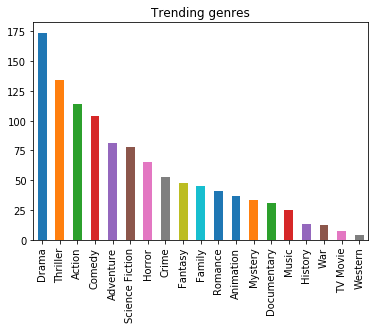

In [37]:
#display the genre's presence in movies during the last 3 years (2013-2015) 
#in a descendent way from the most to the least trending

genre.value_counts().plot(kind='bar')
plt.title('Trending genres')

>As shown in the graph, the most trending genres are:<br> 1/ Drama <br>2/ Thriller<br> 3/ Action

### The criteria for a successful movie -based on the audience ratings-

In [60]:
df.describe()

,id,popularity,runtime,vote_average,release_year,budget_adj,revenue_adj
count,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1.992000e+03,1.992000e+03
mean,71652.152108,1.316763,106.040161,6.178614,2007.796687,3.627376e+07,1.302391e+08
std,92355.883915,1.873563,29.234592,0.881955,7.549224,5.129783e+07,2.564338e+08
min,11.000000,0.000620,0.000000,2.100000,1961.000000,0.000000e+00,0.000000e+00
25%,9699.000000,0.384079,92.000000,5.600000,2006.000000,0.000000e+00,0.000000e+00
50%,35112.500000,0.774223,102.000000,6.200000,2010.000000,1.524601e+07,2.806370e+07
75%,83573.000000,1.538639,116.000000,6.800000,2012.000000,5.064450e+07,1.393645e+08
max,414419.000000,32.985763,705.000000,8.300000,2015.000000,4.250000e+08,2.827124e+09


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fba5e8c26a0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fba5d4667f0>]], dtype=object)

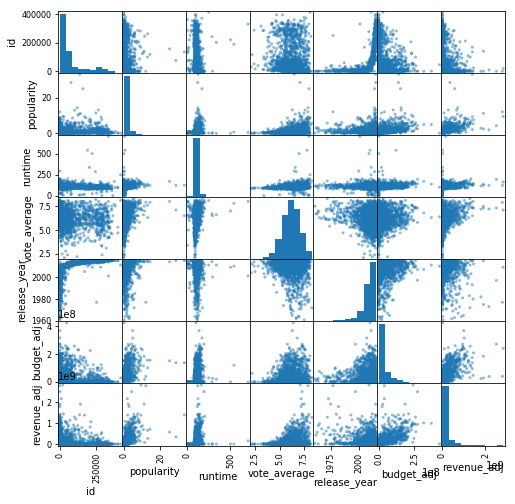

In [111]:
#display the relationships between variables
pd.plotting.scatter_matrix(df,figsize=(8,8))

In [57]:
#create a function displaying dependencies
def show_dependency(a):
    df.plot(x=a, y="vote_average", kind="scatter");
    #choose the title
    plt.title('Vote average dependending on '+a)
    #Name axes
    plt.xlabel(a)
    plt.ylabel('Vote Average')

### Vote average depending on the duration of the movies

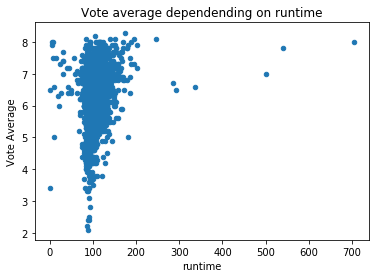

In [58]:
show_dependency("runtime")

>We note that movies whose duration is between <b>60</b> and <b>150</b> minutes are the most rated.


##### <e> Remark </e>

In [14]:
#display movies whose duration is more than 200 minutes
df.query('runtime>=200')

,id,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_average,release_year,budget_adj,revenue_adj
1235,242754,0.093377,Klondike,Richard Madden|Abbie Cornish|Sam Shepard|Tim R...,Simon Cellan Jones,285,Drama|History,Scott Free Productions|Discovery Channel|E1 En...,1/20/14,6.7,2014,0.000000e+00,0.000000e+00
1865,220903,0.102223,Life,David Attenborough|Oprah Winfrey,Martha Holmes|Simon Blakeney|Stephen Lyle,500,Documentary,British Broadcasting Corporation (BBC),12/14/09,7.0,2009,0.000000e+00,0.000000e+00
2214,189197,0.757082,The Pacific,James Badge Dale|Joseph Mazzello|Jon Seda|Asht...,Jeremy Podeswa|Tim Van Patten|David Nutter|Gra...,540,War|Drama|Action|Adventure|History,Playtone|HBO|DreamWorks Television,5/16/10,7.8,2010,1.200000e+08,0.000000e+00
2722,331214,0.537593,Band of Brothers,Damian Lewis|Ron Livingston|Frank John Hughes|...,Phil Alden Robinson|Richard Loncraine|Mikael S...,705,Action|Drama|War,HBO,9/9/01,8.0,2001,0.000000e+00,1.539360e+08
3759,54293,0.252508,Zeitgeist: Moving Forward,Robert Sapolsky|GÃ¡bor MÃ¡tÃ©|Richard G. Wilki...,Peter Joseph,201,Documentary,Gentle Machine Productions LLC,1/15/11,7.2,2011,0.000000e+00,0.000000e+00
3826,414419,0.146477,Kill Bill: The Whole Bloody Affair,Uma Thurman|Lucy Liu|Vivica A. Fox|Daryl Hanna...,Quentin Tarantino,247,Crime|Action,Miramax Films|A Band Apart|Super Cool ManChu,3/28/11,8.1,2011,2.908194e+07,0.000000e+00
3886,202241,0.044221,Mildred Pierce,Kate Winslet|Evan Rachel Wood|Guy Pearce|Mare ...,Todd Haynes,336,Drama,Home Box Office (HBO)|Metro-Goldwyn-Mayer (MGM),3/27/11,6.6,2011,1.938796e+07,0.000000e+00
4949,122,7.122455,The Lord of the Rings: The Return of the King,Elijah Wood|Ian McKellen|Viggo Mortensen|Liv T...,Peter Jackson,201,Adventure|Fantasy|Action,WingNut Films|New Line Cinema,12/1/03,7.9,2003,1.114231e+08,1.326278e+09
8768,876,0.381729,Frank Herbert's Dune,William Hurt|Alec Newman|Saskia Reeves|Ian McN...,John Harrison,292,Action|Adventure|Fantasy|Science Fiction,New Amsterdam Entertainment|Tandem Communications,12/3/00,6.5,2000,2.532584e+07,0.000000e+00


>Surprisingly, movies whose duration is more than <b>200</b> minutes are highly rated.
"Band of Brothers" for example, a movie whose duration is more than 700 min (11h) is a masterpiece being one of the most rated audio-visual project.

### Vote average depending on the budget of the movies

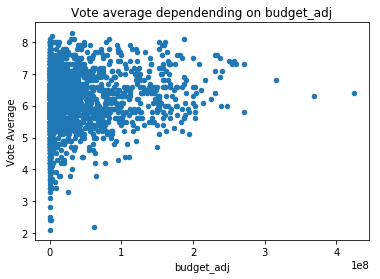

In [59]:
show_dependency("budget_adj")

>We note that movies <e>highly budgeted</e> are most likely to get audience satisfaction.<br>
<b>However</b>, it's not a criterion for a movie's success; as we remark that even low-budgeted movies could satisfy the audience and be well-rated.

In [40]:
#extract non-budgeted movies with high rating
df3=df.query('vote_average >= 8.0 and budget_adj == 0.0')
df3

,id,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_average,release_year,budget_adj,revenue_adj
736,110416,1.376670,Song of the Sea,Brendan Gleeson|Fionnula Flanagan|David Rawle|...,Tomm Moore,93,Family|Animation|Fantasy,Irish Film Board|Digital Graphics|Big Farm|Car...,9/6/14,8.0,2014,0.0,7.898558e+05
2075,58496,0.629432,Senna,Ayrton Senna|Alain Prost|Frank Williams|Ron De...,Asif Kapadia,106,Documentary,Universal Pictures|StudioCanal|Midfield Films|...,10/7/10,8.0,2010,0.0,8.212430e+06
2389,55244,0.052322,Bill Cunningham New York,Bill Cunningham|Tom Wolfe|Anna Wintour|Carmen ...,Richard Press,84,Documentary,First Thought Films,3/24/10,8.1,2010,0.0,1.339650e+06
2722,331214,0.537593,Band of Brothers,Damian Lewis|Ron Livingston|Frank John Hughes|...,Phil Alden Robinson|Richard Loncraine|Mikael S...,705,Action|Drama|War,HBO,9/9/01,8.0,2001,0.0,1.539360e+08
2959,13042,0.905428,Presto,Doug Sweetland,Doug Sweetland,5,Animation|Family,Pixar Animation Studios,6/18/08,8.0,2008,0.0,0.000000e+00
3051,33409,0.511786,The Stoning of Soraya M.,Shohreh Aghdashloo|Mozhan MarnÃ²|Jim Caviezel|...,Cyrus Nowrasteh,114,Crime|Drama,Roadside Attractions|Mpower Pictures|Prime Mer...,9/7/08,8.0,2008,0.0,0.000000e+00
4434,140420,1.182679,Paperman,John Kahrs|Kari Wahlgren|Jeff Turley|Jack Gold...,John Kahrs,7,Animation|Family|Romance,Disney,11/2/12,8.0,2012,0.0,0.000000e+00
5209,21525,0.238250,Tupac: Resurrection,Tupac Shakur,Lauren Lazin,112,Music|Documentary,Paramount Pictures|MTV Films,1/23/03,8.0,2003,0.0,9.255855e+06
10817,13963,0.064029,The Last Waltz,Robbie Robertson|Rick Danko|Levon Helm|Richard...,Martin Scorsese,117,Documentary|Music,FM Productions|Last Waltz Inc.,5/1/78,8.0,1978,0.0,1.076189e+06


In [34]:
#count how many movies are non-budgeted but highly rated 
df3['original_title'].count()

9

> We remark that 9 movies with <b>0 budget</b> got well rated.

### Vote average depending on the popularity of the movies

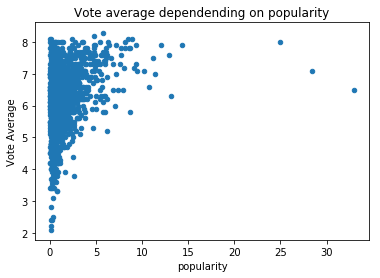

In [60]:
show_dependency("popularity")

>We note that the most popular movies are well rated.<br>
<b>However</b>, even non-popular movies can get well-rated.

In [38]:
#display most popular movies
df.query('popularity >= 30')

,id,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,6.5,2015,1.379999e+08,1.392446e+09


In [41]:
#extract non popular but well-rated movies 
df.query('popularity < 0.38 and vote_average>8.0')

,id,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_average,release_year,budget_adj,revenue_adj
2389,55244,0.052322,Bill Cunningham New York,Bill Cunningham|Tom Wolfe|Anna Wintour|Carmen ...,Richard Press,84,Documentary,First Thought Films,3/24/10,8.1,2010,0.000000e+00,1339650.0
3826,414419,0.146477,Kill Bill: The Whole Bloody Affair,Uma Thurman|Lucy Liu|Vivica A. Fox|Daryl Hanna...,Quentin Tarantino,247,Crime|Action,Miramax Films|A Band Apart|Super Cool ManChu,3/28/11,8.1,2011,2.908194e+07,0.0


> We notice that even non-popular movies can get well-rated

<a id='conclusions'></a>
## Conclusions

> The wrangling, the cleaning, and the visualizing of the data as well as their interpretation conducted to the conclusions below:<br><br>
The most trending genres during 2013, 2014, and 2015 are Drama, in the first place, followed by Thriller and action.<br>
History, war, TV Movies, and Western movies are the least produced genres.<br> Unfortunately, the database contains only information about movies from 1966 to 2015,  so we can't know what's trending nowadays as genres.<br><br>
Most movies are of duration between 60 to 150 minutes. But, it's not a criterion for a successful movie, as even long ones get well-rated.<br>
Highly-budgeted movies are more likely to be successful. <br>But, it's not a criterion to decide the success of a movie: We have nine non-budgeted movies whose ratings are more than 8.0 like: 'Tupac: Resurrection, ' Song of the Sea' ...<br><br>
Popular movies are generally well-rated, but it's not general. <br>The most popular in this dataset: "Jurassic World"  is rated 6.5. <br>Although it's the most popular, it's not the most rated. <br>At the same time, some non-popular movies got well rated, like:  'Kill Bill: The Whole Bloody Affair. <br>So, popularity can't guarantee audience satisfaction.

### Limitations 
>-As we don't have the latest data about movies, we can't decide on the most trending movies nowadays.<br><br>
-There are still more areas to study about the criteria to have a successful movie:<br>
1/ The impact of having well-known actors: <br>
Make a study about the most famous actors in a sample of years. <br>
Then, make a study about the impact of their presence on the success of a movie. <br>
2/ The expertise of the director:<br>
A Research to make about this issue and then we study the impact of the best directors in making movies<br>
3/whether it has a home page or not: <br>
It is a part of the marketing strategy to take into consideration.

In [61]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0